## Notebook for the development of analysis tools for heterogeneous reconstructions made with CryoSPARC or CryoDRGN


In [1]:
### imports
# general
import os
import numpy as np
import pandas as pd

# roodmus
from importlib import reload
import roodmus.analysis.utils
reload(roodmus.analysis.utils)
from roodmus.analysis.utils import load_data
# from roodmus.heterogeneity.plot_heterogeneous_reconstruction import (
# )

In [2]:
### data loading
### steered MD data set for the Covid-19 spike protein (PDB id: 6xm5)
config_dir = "/mnt/parakeet_storage6/MapReconstruction/6xm5_steered_Roodmus_2/mrc/"
meta_file = "/mnt/parakeet_storage6/MapReconstruction/6xm5_steered_Roodmus_2/cryoSPARC/J577_passthrough_particles.cs"
jobtypes = {
    "/mnt/parakeet_storage6/MapReconstruction/6xm5_steered_Roodmus_2/cryoSPARC/J526_passthrough_particles.cs": "Flexible refinement",
    "/mnt/parakeet_storage6/MapReconstruction/6xm5_steered_Roodmus_2/cryoSPARC/J577_passthrough_particles.cs": "Flexible refinement",
}
latent_file = "/mnt/parakeet_storage6/MapReconstruction/6xm5_steered_Roodmus_2/cryoSPARC/J577_latents_022224.cs"

particle_diameter = 100 # approximate particle diameter in Angstroms
ugraph_shape = (4000, 4000) # shape of the micrograph in pixels. Only needs to be given if the metadata file is a .star file
verbose = True
ignore_missing_files = True
enable_tqdm = True

analysis = load_data(meta_file, config_dir, particle_diameter, ugraph_shape=ugraph_shape, verbose=verbose, enable_tqdm=enable_tqdm, ignore_missing_files=ignore_missing_files) # creates the class


loading metadata from /mnt/parakeet_storage6/MapReconstruction/6xm5_steered_Roodmus_2/cryoSPARC/J577_passthrough_particles.cs...
loaded metadata from /mnt/parakeet_storage6/MapReconstruction/6xm5_steered_Roodmus_2/cryoSPARC/J577_passthrough_particles.cs. determined file type: cs


Dictionaries now contain 213000 reconstructed particles
added 213000 particles from /mnt/parakeet_storage6/MapReconstruction/6xm5_steered_Roodmus_2/cryoSPARC/J577_passthrough_particles.cs


loading truth data: 100%|██████████| 799/799 [04:21<00:00,  3.06it/s, micrograph=000798.mrc]

Loaded ground-truth particle positions from config files
Dictionaries now contain 213000 particles and 199750 true particles
Added 199750 particles from /mnt/parakeet_storage6/MapReconstruction/6xm5_steered_Roodmus_2/mrc/


In [3]:
### turn the loaded data into a pandas dataframe
df_picked = pd.DataFrame(analysis.results_picking)
df_truth = pd.DataFrame(analysis.results_truth)
df_picked.tail()


,metadata_filename,ugraph_filename,position_x,position_y,euler_phi,euler_theta,euler_psi,ugraph_shape,defocusU,defocusV,class2D
212995,/mnt/parakeet_storage6/MapReconstruction/6xm5_...,000798.mrc,3116.0,2064.0,-0.925144,2.674026,0.604917,"[4000, 4000]",14764.269531,14764.269531,40
212996,/mnt/parakeet_storage6/MapReconstruction/6xm5_...,000798.mrc,3572.0,2696.0,0.490432,2.525035,-2.889620,"[4000, 4000]",14764.269531,14764.269531,28
212997,/mnt/parakeet_storage6/MapReconstruction/6xm5_...,000798.mrc,3680.0,1124.0,2.343655,2.700262,2.166481,"[4000, 4000]",14764.269531,14764.269531,12
212998,/mnt/parakeet_storage6/MapReconstruction/6xm5_...,000798.mrc,3336.0,872.0,0.684857,2.917804,3.091442,"[4000, 4000]",14764.269531,14764.269531,14
212999,/mnt/parakeet_storage6/MapReconstruction/6xm5_...,000798.mrc,560.0,520.0,-0.919896,2.510094,-0.627793,"[4000, 4000]",14764.269531,14764.269531,40


In [4]:
df_precision, df_picked = analysis.compute_precision(df_picked, df_truth, verbose=verbose)
df_precision.tail()

For each micrograph, for each metadata file, compute the precision, recall and multiplicity
Speed of computation depends on the number of particles in the micrograph. progressbar is not accurate
Total number of groups to loop over: 799
Number of micgrographs: 799
Number of metadata files: 1
Starting loop over groups


computing precision: 100%|██████████| 799/799 [00:38<00:00, 20.51it/s, precision=0.988, recall=0.335, multiplicity=0.348]


time taken to compute precision: 39.449209451675415


,metadata_filename,ugraph_filename,defocus,num_particles_picked,num_particles_truth,TP,FP,FN,precision,recall,multiplicity
794,/mnt/parakeet_storage6/MapReconstruction/6xm5_...,000794.mrc,-14359.149102,299,250,221.0,78.0,40.0,0.739130,0.846743,0.908
795,/mnt/parakeet_storage6/MapReconstruction/6xm5_...,000795.mrc,-20297.050076,254,250,208.0,46.0,46.0,0.818898,0.818898,0.860
796,/mnt/parakeet_storage6/MapReconstruction/6xm5_...,000796.mrc,-4646.860356,187,250,177.0,10.0,77.0,0.946524,0.696850,0.732
797,/mnt/parakeet_storage6/MapReconstruction/6xm5_...,000797.mrc,-10571.399862,293,250,224.0,69.0,45.0,0.764505,0.832714,0.916
798,/mnt/parakeet_storage6/MapReconstruction/6xm5_...,000798.mrc,-14799.755446,83,250,82.0,1.0,163.0,0.987952,0.334694,0.348


In [8]:
df_picked.head(5)

,metadata_filename,ugraph_filename,position_x,position_y,euler_phi,euler_theta,euler_psi,ugraph_shape,defocusU,defocusV,class2D,TP,closest_dist,closest_particle,closest_pdb,closest_pdb_index
0,/mnt/parakeet_storage6/MapReconstruction/6xm5_...,000000.mrc,624.0,428.0,-3.113433,2.754968,-1.539696,"[4000, 4000]",4952.724609,4952.724609,25,True,20.100593,142,/home/mjoosten1/projects/roodmus/data/6xm5_ste...,5417.0
1,/mnt/parakeet_storage6/MapReconstruction/6xm5_...,000000.mrc,3456.0,2304.0,-2.800817,2.841853,-1.537108,"[4000, 4000]",4952.724609,4952.724609,14,True,11.318085,187,/home/mjoosten1/projects/roodmus/data/6xm5_ste...,7061.0
2,/mnt/parakeet_storage6/MapReconstruction/6xm5_...,000000.mrc,1856.0,988.0,-2.424132,2.755190,-1.495867,"[4000, 4000]",4952.724609,4952.724609,32,True,17.248081,163,/home/mjoosten1/projects/roodmus/data/6xm5_ste...,6312.0
3,/mnt/parakeet_storage6/MapReconstruction/6xm5_...,000000.mrc,2556.0,3460.0,-2.398434,2.911187,-1.460370,"[4000, 4000]",4952.724609,4952.724609,31,True,29.141709,242,/home/mjoosten1/projects/roodmus/data/6xm5_ste...,9671.0
4,/mnt/parakeet_storage6/MapReconstruction/6xm5_...,000000.mrc,1284.0,820.0,-2.240460,2.822624,-1.438186,"[4000, 4000]",4952.724609,4952.724609,31,True,17.936866,94,/home/mjoosten1/projects/roodmus/data/6xm5_ste...,3556.0


In [ ]:
df_picked["closest_pdb"]

In [7]:
df_picked.iloc[0]["closest_pdb"]

'/home/mjoosten1/projects/roodmus/data/6xm5_steered_Roodmus_1/pdb/conformation_005417.pdb'

In [ ]:
# add the latent space coordinates to the dataframe
import roodmus.analysis.utils
reload(roodmus.analysis.utils)
from roodmus.analysis.utils import IO
latent_space, ndim = IO.get_latents_cs(latent_file)

for i in range(ndim):
    df_picked["latent_{}".format(i)] = latent_space[:, i]

df_picked.tail()

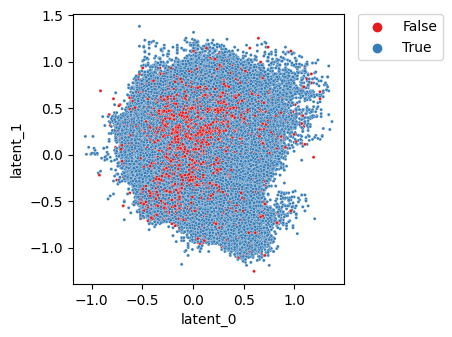

In [9]:
# plot the latent space
import roodmus.heterogeneity.plot_heterogeneous_reconstruction
reload(roodmus.heterogeneity.plot_heterogeneous_reconstruction)
from roodmus.heterogeneity.plot_heterogeneous_reconstruction import (
    plot_latent_space_scatter
)

grid = plot_latent_space_scatter(
    df_picked,
    # ndim,
    dim_1=0,
    dim_2=1,
    pca=False,
    tsne=False,
    color_by="TP",
    # color_by="closest_pdb_index",
    # color_by="closest_dist",
    # color_by="defocusU",
    palette="Set1",
)

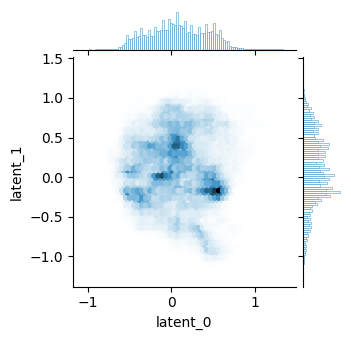

In [11]:
# hexbin plot
import roodmus.heterogeneity.plot_heterogeneous_reconstruction
reload(roodmus.heterogeneity.plot_heterogeneous_reconstruction)
from roodmus.heterogeneity.plot_heterogeneous_reconstruction import (
    plot_latent_space_hexbin
)

grid = plot_latent_space_hexbin(
    df_picked,
    # ndim,
    dim_1=0,
    dim_2=1,
    pca=False,
    tsne=False,
    # color_by="TP",
    # color_by="defocusU",
    palette="Set1",
)


In [ ]:
# hexbin plot
grid = sns.jointplot(
    x="PC1",
    y="PC2",
    data=df,
    kind="hex",
    color="k",
    gridsize=55,
    bins="log",
    cmap="coolwarm",
    marginal_kws=dict(bins=100, fill=False),
)

grid = sns.jointplot(
    x="latent_0",
    y="latent_1",
    data=df_picked,
    kind="hex",
    color="k",
    gridsize=55,
    bins="log",
    cmap="coolwarm",
    marginal_kws=dict(bins=100, fill=False),
)



In [ ]:
# scatter plot coloured by TP
grid = sns.jointplot(
    x="PC1",
    y="PC2",
    data=df,
    hue="TP",
    s=4,
    alpha=0.5,
    palette=[]
)


In [ ]:
# scatter plot coloured by class2D
grid = sns.jointplot(
    x="PC1",
    y="PC2",
    data=df,
    hue="class2D",
    s=4,
    alpha=0.5,
)